In [1]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_258_Repo\\EE_258\\ML_PATH_EE258\\EE258_env\\homework\\HW3'

In [75]:
#1. Import Necessary Liobraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [51]:
#Import the dataset
reg_dataset = pd.read_excel("HW3_RegressionDataSet.xlsx")

#Save the iris dataset as a dataframe
reg_dataset_df = pd.DataFrame(reg_dataset)

In [52]:
#Understanding the dataset
 #Functions .head() .info() .describe()
reg_dataset_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [14]:
reg_dataset_df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [53]:
reg_dataset_df.info()
#The output describes the count, and amount of collumns list:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


### Question 3

In [34]:
# a.)
# Assuming you have already loaded reg_dataset_df
# Extract feature (AT) and target (PE)
X = reg_dataset_df[['AT']].values  # Extract AT column as input
y = reg_dataset_df[['PE']].values  # Extract PE column as output

# Add bias term (column of ones) to X for w0 (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term to X

# Compute theta (Normal Equation solution)
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Extract coefficients
w0 = theta[0][0]  # Intercept term
w1 = theta[1][0]  # Slope term

# Print results
print(f"Linear Regression Coefficients:")
print(f"w0 (Intercept) = {w0:.4f}")
print(f"w1 (Slope) = {w1:.4f}")

Linear Regression Coefficients:
w0 (Intercept) = 497.0341
w1 (Slope) = -2.1713


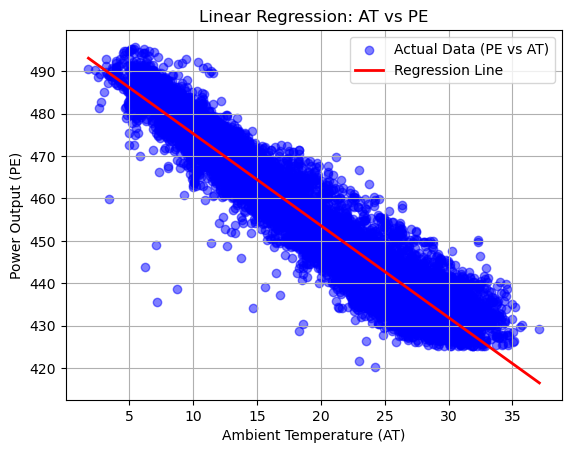

In [36]:
#b.) & c.) 

# Extract coefficients
w0, w1 = theta.flatten()
# Generate predictions for regression line
X_plot = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_pred = w0 + w1 * X_plot

# Plot data points
plt.scatter(X, y, color='blue', label='Actual Data (PE vs AT)', alpha=0.5)

# Plot regression line
plt.plot(X_plot, y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Ambient Temperature (AT)')
plt.ylabel('Power Output (PE)')
plt.title('Linear Regression: AT vs PE')
plt.legend()
plt.grid()

# Display the plot
plt.show()

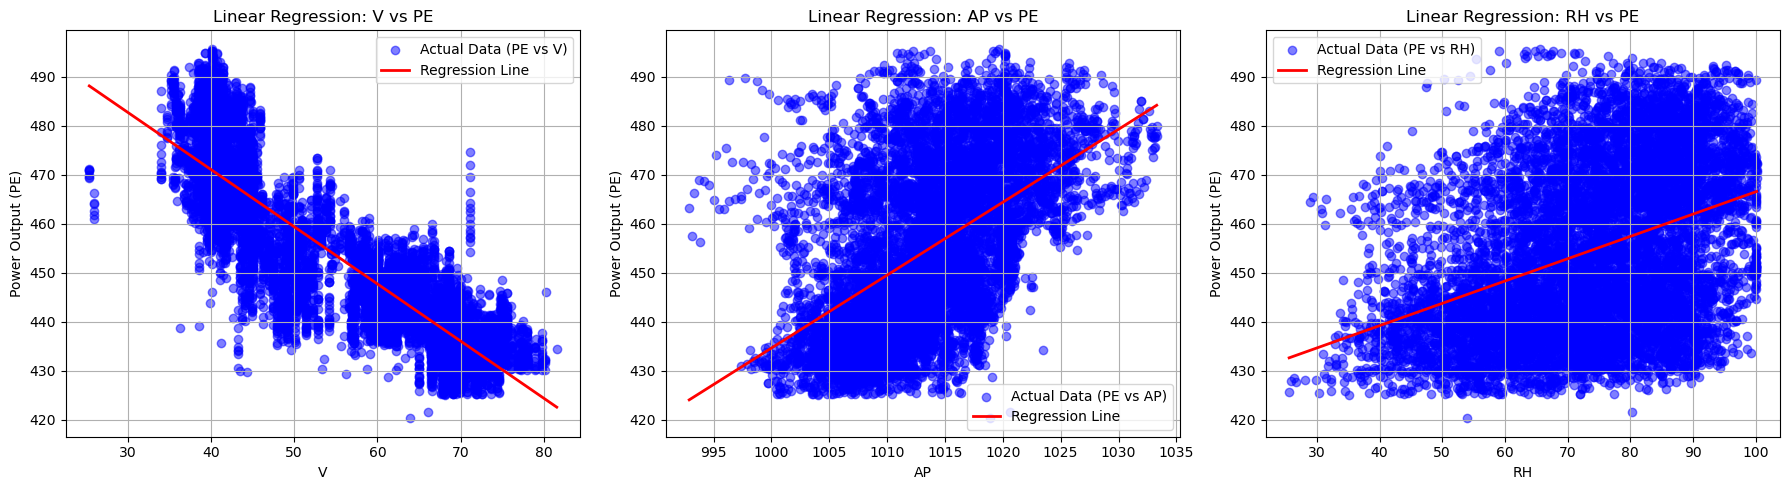

,V,AP,RH
Intercept (w0),517.801526,-1055.260989,420.961766
Slope (w1),-1.168135,1.489872,0.455650


In [46]:
# Repeat parts a-b for V, AP, and RH as features

# Define the features to iterate over
features = ['V', 'AP', 'RH']
coefficients = {}

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop over each feature, compute normal equation solution, and plot results
for i, feature in enumerate(features):
    # Extract feature and target
    X = reg_dataset_df[[feature]].values  # Selecting the feature column
    y = reg_dataset_df[['PE']].values  # Power Output (PE)

    # Add bias term to X
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Compute theta (Normal Equation solution)
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    # Extract coefficients
    w0, w1 = theta.flatten()
    coefficients[feature] = (w0, w1)

    # Generate predictions for regression line
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = w0 + w1 * X_plot

    # Plot data points
    axes[i].scatter(X, y, color='blue', label=f'Actual Data (PE vs {feature})', alpha=0.5)

    # Plot regression line
    axes[i].plot(X_plot, y_pred, color='red', linewidth=2, label='Regression Line')

    # Labels and title
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Power Output (PE)')
    axes[i].set_title(f'Linear Regression: {feature} vs PE')
    axes[i].legend()
    axes[i].grid()

# Show all plots
plt.tight_layout()
plt.show()

# Display computed coefficients
import pandas as pd
coeff_df = pd.DataFrame(coefficients, index=['Intercept (w0)', 'Slope (w1)'])

display(coeff_df)  # Works in Jupyter Notebook

### Question 4

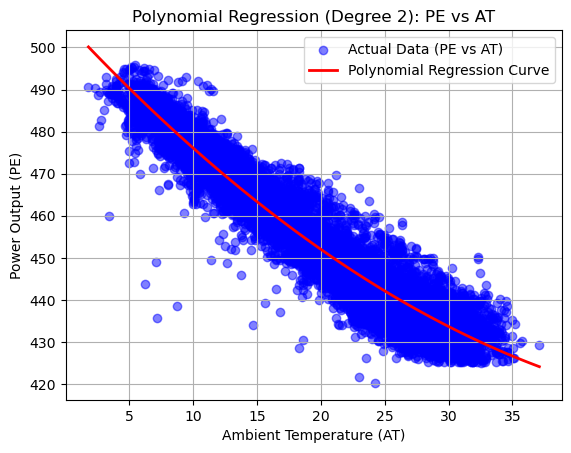

,Coefficient,Value
0,Intercept (w0),505.950401
1,Linear Term (w1),-3.270152
2,Quadratic Term (w2),0.028700


In [47]:
# Extract feature (AT) and target (PE)
X = reg_dataset_df[['AT']].values  # Ambient Temperature (AT)
y = reg_dataset_df[['PE']].values  # Power Output (PE)

# Create polynomial features (degree 2): [1, X, X^2]
X_poly = np.c_[np.ones((X.shape[0], 1)), X, X**2]

# Compute theta (Normal Equation solution)
theta_poly = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

# Extract coefficients
w0, w1, w2 = theta_poly.flatten()

# Generate predictions for regression curve
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = np.c_[np.ones((X_plot.shape[0], 1)), X_plot, X_plot**2]
y_pred = X_plot_poly @ theta_poly

# Plot data points
plt.scatter(X, y, color='blue', label='Actual Data (PE vs AT)', alpha=0.5)

# Plot regression curve
plt.plot(X_plot, y_pred, color='red', linewidth=2, label='Polynomial Regression Curve')

# Labels and title
plt.xlabel('Ambient Temperature (AT)')
plt.ylabel('Power Output (PE)')
plt.title('Polynomial Regression (Degree 2): PE vs AT')
plt.legend()
plt.grid()

# Display the plot
plt.show()

# Display computed coefficients
coeff_poly_df = pd.DataFrame({'Coefficient': ['Intercept (w0)', 'Linear Term (w1)', 'Quadratic Term (w2)'],
                              'Value': [w0, w1, w2]})
display(coeff_poly_df)  # Works in Jupyter Notebook

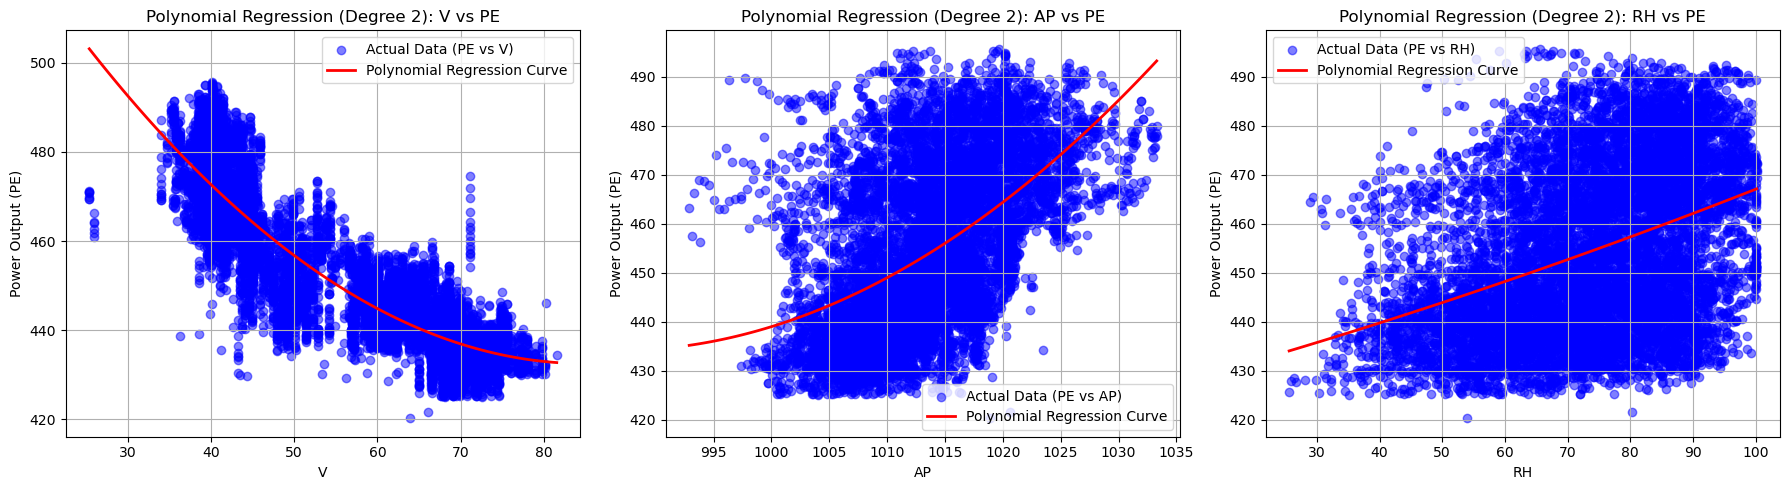

,V,AP,RH
Intercept (w0),576.087466,26765.072611,424.719739
Linear Term (w1),-3.382967,-53.381946,0.343434
Quadratic Term (w2),0.019929,0.027056,0.000800


In [48]:
# Polynomial Regression (Degree 2) for V, AP, and RH using Normal Equations

# Define the features to iterate over
features = ['V', 'AP', 'RH']
coefficients = {}

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop over each feature, compute normal equation solution, and plot results
for i, feature in enumerate(features):
    # Extract feature and target
    X = reg_dataset_df[[feature]].values  # Selecting the feature column
    y = reg_dataset_df[['PE']].values  # Power Output (PE)

    # Create polynomial features (degree 2): [1, X, X^2]
    X_poly = np.c_[np.ones((X.shape[0], 1)), X, X**2]

    # Compute theta (Normal Equation solution)
    theta_poly = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    # Extract coefficients
    w0, w1, w2 = theta_poly.flatten()
    coefficients[feature] = (w0, w1, w2)

    # Generate predictions for regression curve
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_poly = np.c_[np.ones((X_plot.shape[0], 1)), X_plot, X_plot**2]
    y_pred = X_plot_poly @ theta_poly

    # Plot data points
    axes[i].scatter(X, y, color='blue', label=f'Actual Data (PE vs {feature})', alpha=0.5)

    # Plot regression curve
    axes[i].plot(X_plot, y_pred, color='red', linewidth=2, label='Polynomial Regression Curve')

    # Labels and title
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Power Output (PE)')
    axes[i].set_title(f'Polynomial Regression (Degree 2): {feature} vs PE')
    axes[i].legend()
    axes[i].grid()

# Show all plots
plt.tight_layout()
plt.show()

# Display computed coefficients
coeff_poly_df = pd.DataFrame(coefficients, index=['Intercept (w0)', 'Linear Term (w1)', 'Quadratic Term (w2)'])
display(coeff_poly_df)  # Works in Jupyter Notebook

### Question 5

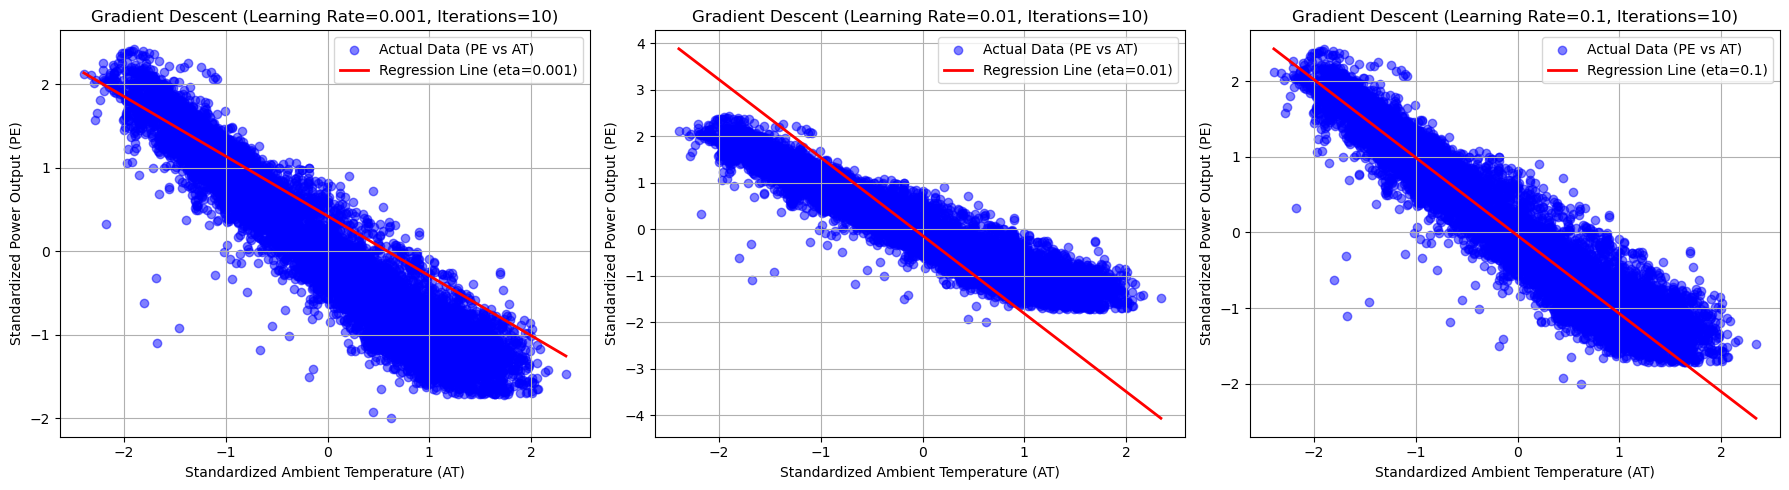

,0.001,0.010,0.100
Intercept (w0),-0.040663,-0.040663,-0.040663
Slope (w1),-1.029769,-1.029769,-1.029769


In [65]:

# Extract feature (AT) and target (PE)
X = reg_dataset_df[['AT']].values  # Ambient Temperature (AT)
y = reg_dataset_df[['PE']].values  # Power Output (PE)

# Normalize X for better gradient descent stability
X = (X - np.mean(X)) / np.std(X)  # Standardization
y = (y - np.mean(y)) / np.std(y)  # Standardization

# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Bias term for w0

# Initialize parameters
w = np.zeros(2)  # [w0, w1]
m = len(y)  # Number of data points

# Apply gradient descent for 10 iterations and plot regression lines for different learning rates

# Define learning rates for comparison
learning_rates = [0.001, 0.01, 0.1]  # Small, Normal, Large
n_iterations = 10  # Only first 10 iterations

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop over different learning rates
for i, eta in enumerate(learning_rates):
    # Random initialization of theta
    theta = np.random.randn(2, 1)

    # Store history for visualization
    theta_history = []

    # Perform gradient descent for only 10 iterations
    for iteration in range(n_iterations):
        gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        theta_history.append(theta.copy())

    # Generate regression line for the last iteration
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_b = np.c_[np.ones((X_plot.shape[0], 1)), X_plot]
    y_pred = X_plot_b.dot(theta)

    # Plot data points
    axes[i].scatter(X, y, color='blue', label='Actual Data (PE vs AT)', alpha=0.5)
    # Plot regression line
    axes[i].plot(X_plot, y_pred, color='red', linewidth=2, label=f'Regression Line (eta={eta})')

    # Labels and title
    axes[i].set_xlabel('Standardized Ambient Temperature (AT)')
    axes[i].set_ylabel('Standardized Power Output (PE)')
    axes[i].set_title(f'Gradient Descent (Learning Rate={eta}, Iterations={n_iterations})')
    axes[i].legend()
    axes[i].grid()

# Show all plots
plt.tight_layout()
plt.show()

# Display final computed coefficients for each learning rate after 10 iterations
coefficients = {lr: theta.flatten() for lr, theta in zip(learning_rates, [theta_history[-1] for _ in learning_rates])}
coeff_gd_df = pd.DataFrame(coefficients, index=['Intercept (w0)', 'Slope (w1)'])


display(coeff_gd_df)  # Works in Jupyter Notebook

Obervation: The gradient descent results for different learning rates demonstrate significant variations in convergence behavior. With a very small learning rate (0.0001), the regression line updates too slowly, showing gradual convergence but requiring many iterations to reach an optimal solution. At a normal learning rate (0.01), the model diverges rapidly, causing unstable and extreme weight updates. The large learning rate (0.1) results in even more drastic divergence, leading to massive fluctuations in the regression line and an inability to find a stable solution. The computed intercept and slope values confirm numerical instability at higher learning rates, reinforcing the need for careful learning rate selection. Compared to the Normal Equation, which provides an exact solution, gradient descent must be fine-tuned to balance convergence speed and stability, potentially using techniques like adaptive learning rates.

### Question 5 

In [72]:
# Multiple Linear Regression using Normal Equation

# Extract features (AT, V, AP, RH) and target (PE)
X = reg_dataset_df[['AT', 'V', 'AP', 'RH']].values  # Selecting all four features
y = reg_dataset_df[['PE']].values  # Power Output (PE)

# Add bias term to X (for intercept w0)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Compute theta (Normal Equation solution)
theta_mlr = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Extract coefficients
coefficients = theta_mlr.flatten()

# Compute predictions
y_pred = X_b @ theta_mlr

# Compute Mean Squared Error (Cost function)
mse = np.mean((y_pred - y) ** 2)

# Compute Correlation Matrix
correlation_matrix = reg_dataset_df[['AT', 'V', 'AP', 'RH', 'PE']].corr()

# Display computed coefficients
coefficients_df = pd.DataFrame(coefficients, index=['Intercept (w0)', 'AT (w1)', 'V (w2)', 'AP (w3)', 'RH (w4)'], columns=['Value'])

# Show results
mse


20.76739753253501

In [71]:
correlation_matrix

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [73]:

display(coefficients_df)  # Works in Jupyter Notebook

,Value
Intercept (w0),454.609274
AT (w1),-1.977513
V (w2),-0.233916
AP (w3),0.062083
RH (w4),-0.158054


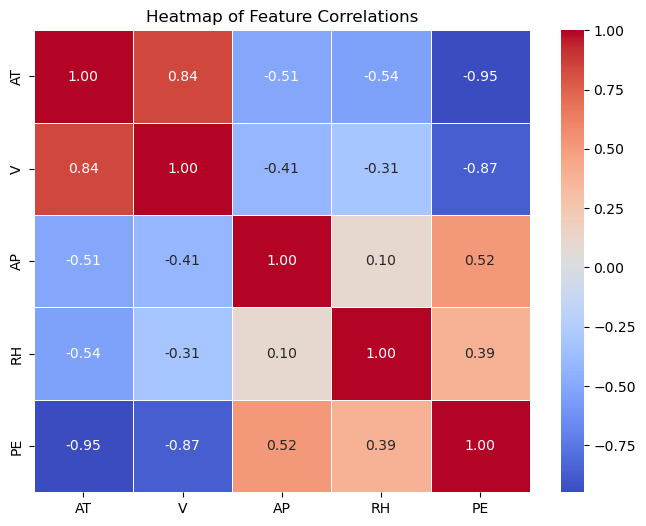

In [76]:
# Compute the correlation matrix
correlation_matrix = reg_dataset_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("Heatmap of Feature Correlations")
plt.show()